# 🧼 Data Preparation: Beginner Project

This notebook performs basic data loading, cleaning, and visualization using **pandas** and **matplotlib**.

**1. DATA PREPARATION**

ADDING DATA INTO THE DATAFRAME

In [15]:
#importing the necessary module
from google.colab import files
#uploading the file
uploaded=files.upload()

Saving Sample - Superstore.csv to Sample - Superstore (1).csv


# DISCIPLING THE FIRST FEW ROWS OF THE DATAFRAME

## 📥 Step 1: Load the Dataset

In [16]:
import pandas as pd
#assuming the uploaded files is named 'salesData.xlsx'
file_name =list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding='latin1')

#display the fisrt few rows of the dataFrame
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

CHECKING FOR MISSING VALUES AND HANDLING THEM APPROPRIATELY


## 🧹 Step 2: Handle Missing Values

In [18]:
#Filling missing values with 0
df['Sales']=df['Sales'].fillna(0)

#Dropping rows with missing values
df=df.dropna()

REMOVE ANY DUPLICATE ROWS IF PRESENT

In [19]:
#Removing duplicate rows if present
df=df.drop_duplicates()

A**2.DATA CLEANING**

CONVERT THE 'POSTAL CODE' COLUMN TO A STRING TYPE

## 🔄 Step 3: Data Type Conversion

In [20]:
# Check if postal code exist
if 'Postal Code' in df.columns:
    # Convert the 'Postal Code' column to a string data type
    df['Postal Code'] = df['Postal Code'].astype(str)
else:
    print("The 'Postal Code' column does not exist in the DataFrame.")

# Display the updated DataFrame
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

EXTRACT THE 'CITY' AND 'STATE' COLUMNS INTO A NEW COLUMN CALLED 'LOCATION' BY COMBINING THEM

In [21]:
# Check if 'City' and 'State' columns exist
if 'City' in df.columns and 'State' in df.columns:
    # Combine 'City' and 'State' into a new 'Location' column
    df['Location'] = df['City'] + ', ' + df['State']
else:
    print("The required columns 'City' and 'State' do not exist in the DataFrame.")

# Display the updated DataFrame
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

**3.DATA ANALYSIS**


CALCULATING THE TOTAL SALES , TOTAL PROFIT AND AVERAGE DISCOUNT FOR EACH YEAR


In [22]:
# Calculate the total sales, total profit, and average discount
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
average_discount = df['Discount'].mean()

#Printing the calculated amount
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Average Discount:", average_discount)

Total Sales: 2297200.8603000003
Total Profit: 286397.0217
Average Discount: 0.15620272163297977


IDENTIFY THE TOP 10 PRODUCTS

In [23]:
if 'Category' in df.columns and 'Sub-Category' in df.columns and 'Sales' in df.columns:
    # Group by 'Sub Category' and sum the sales
    subcategory_sales = df.groupby('Sub-Category',)['Sales'].sum().reset_index()

    # Sort the subcategories by total sales in descending order
    top_subcategories = subcategory_sales.sort_values(by='Sales', ascending=False)

    # Select the top 10 subcategories
    top_10_subcategories = top_subcategories.head(10)
    # Display the top 10 subcategories
    print(top_10_subcategories)
else:
    print("The required columns 'Category', 'Sub Category', and 'Sales' do not exist in the DataFrame.")


   Sub-Category        Sales
13       Phones  330007.0540
5        Chairs  328449.1030
14      Storage  223843.6080
16       Tables  206965.5320
3       Binders  203412.7330
11     Machines  189238.6310
0   Accessories  167380.3180
6       Copiers  149528.0300
4     Bookcases  114879.9963
1    Appliances  107532.1610


DETERMINE THE REGION WITH HIGHEST PROFIT

In [24]:
# Check if 'Region' and 'Profit' columns exist
if 'Region' in df.columns and 'Profit' in df.columns:
    # Group by 'Region' and sum the profits
    region_profit = df.groupby('Region')['Profit'].sum().reset_index()

    # Sort the regions by total profit in descending order
    top_region = region_profit.sort_values(by='Profit', ascending=False).iloc[0]

    # Identify the region with the highest profit
    print("Top Region is: ", top_region['Region'])
    print("Top profit of the region is: ",top_region['Profit'])
else:
    print("The required columns 'Region' and 'Profit' do not exist in the DataFrame.")

Top Region is:  West
Top profit of the region is:  108418.4489


ANALYZE THE SALES AND PROFIT BY PRODUCT CATEGORY AND SUB CATERGORY

In [25]:
# Check if required columns exist
required_columns = {'Category', 'Sub-Category', 'Sales', 'Profit'}
if required_columns.issubset(df.columns):
    # Group by 'Category' and 'Sub Category' and sum the sales and profits
    category_subcategory_summary = df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum','Profit': 'sum'}).reset_index()

    # Display the aggregated results
    print(category_subcategory_summary)


else:
    print(f"The required columns {required_columns} do not exist in the DataFrame.")

           Category Sub-Category        Sales      Profit
0         Furniture    Bookcases  114879.9963  -3472.5560
1         Furniture       Chairs  328449.1030  26590.1663
2         Furniture  Furnishings   91705.1640  13059.1436
3         Furniture       Tables  206965.5320 -17725.4811
4   Office Supplies   Appliances  107532.1610  18138.0054
5   Office Supplies          Art   27118.7920   6527.7870
6   Office Supplies      Binders  203412.7330  30221.7633
7   Office Supplies    Envelopes   16476.4020   6964.1767
8   Office Supplies    Fasteners    3024.2800    949.5182
9   Office Supplies       Labels   12486.3120   5546.2540
10  Office Supplies        Paper   78479.2060  34053.5693
11  Office Supplies      Storage  223843.6080  21278.8264
12  Office Supplies     Supplies   46673.5380  -1189.0995
13       Technology  Accessories  167380.3180  41936.6357
14       Technology      Copiers  149528.0300  55617.8249
15       Technology     Machines  189238.6310   3384.7569
16       Techn

**4.DATA VISUALIZATION**


PERFORM A CORRELATION ANALYSIS BETWEEN NUMERICAL COLUMNS

In [26]:
# Perform correlation analysis between numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Display the correlation matrix
print(correlation_matrix)

            Row ID     Sales  Quantity  Discount    Profit
Row ID    1.000000 -0.001359 -0.004016  0.013480  0.012497
Sales    -0.001359  1.000000  0.200795 -0.028190  0.479064
Quantity -0.004016  0.200795  1.000000  0.008623  0.066253
Discount  0.013480 -0.028190  0.008623  1.000000 -0.219487
Profit    0.012497  0.479064  0.066253 -0.219487  1.000000


USE A PIVOT TABLE TO SUMMARIZE SALES AND PROFIT BY REGION AND CUSTOMER SEGMENT

In [27]:

# Check if required columns exist
required_columns = {'Region', 'Segment', 'Sales', 'Profit'}
if required_columns.issubset(df.columns):
    # Create a pivot table
    pivot_table = pd.pivot_table(df, values=['Sales', 'Profit'],  index=['Region', 'Segment'], aggfunc='sum').reset_index()

    # Display the pivot table
    print(pivot_table)
else:
    print(f"The required columns {required_columns} do not exist in the DataFrame.")


     Region      Segment      Profit        Sales
0   Central     Consumer   8564.0481  252031.4340
1   Central    Corporate  18703.9020  157995.8128
2   Central  Home Office  12438.4124   91212.6440
3      East     Consumer  41190.9843  350908.1670
4      East    Corporate  23622.5789  200409.3470
5      East  Home Office  26709.2168  127463.7260
6     South     Consumer  26913.5728  195580.9710
7     South    Corporate  15215.2232  121885.9325
8     South  Home Office   4620.6343   74255.0015
9      West     Consumer  57450.6040  362880.7730
10     West    Corporate  34437.4299  225855.2745
11     West  Home Office  16530.4150  136721.7770


IDENTIFY ANY OUTLIERS IN THE SALES DATA USING BOX PLOT

## 📈 Step 5: Visualization

/tmp/ipython-input-28-2144708499.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sales_data, labels=segments)


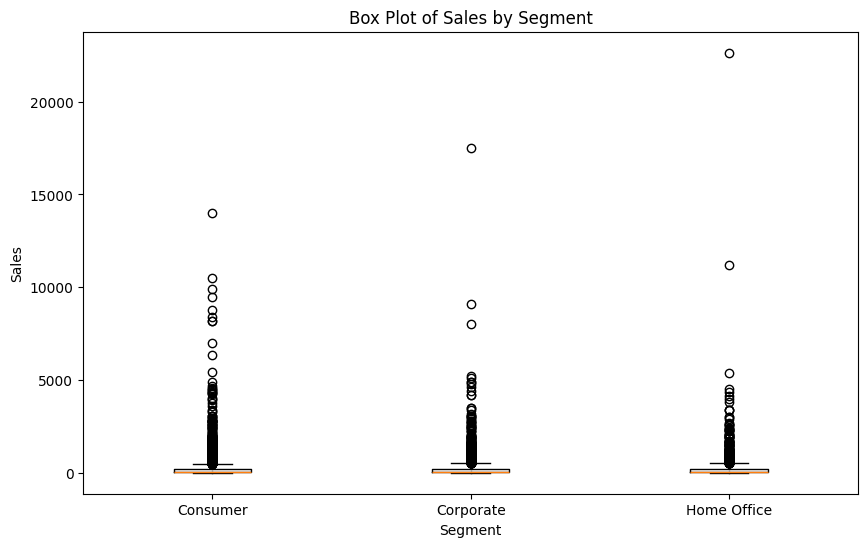

In [28]:
import matplotlib.pyplot as plt



# Prepare data for box plot
segments = df['Segment'].unique()
sales_data = [df[df['Segment'] == segment]['Sales'] for segment in segments]

# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(sales_data, labels=segments)
plt.title('Box Plot of Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

## ✅ Summary
- Loaded the dataset using `pandas`
- Cleaned missing values and converted data types
- Explored basic statistics and plotted visual trends

This foundational step is essential before any modeling or advanced analysis.